In [4]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format='retina'

In [5]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import simplejson as json

from magrec.misc.plot import plot_n_components
from magrec.transformation.MagneticFields import MagneticFields 
from magrec.misc.data import Data

from magrec import __datapath__

In [6]:
# load json file
data = json.load(open(__datapath__  / "Mz" / 'CrI3_Exp_B_20180622_001.json'))

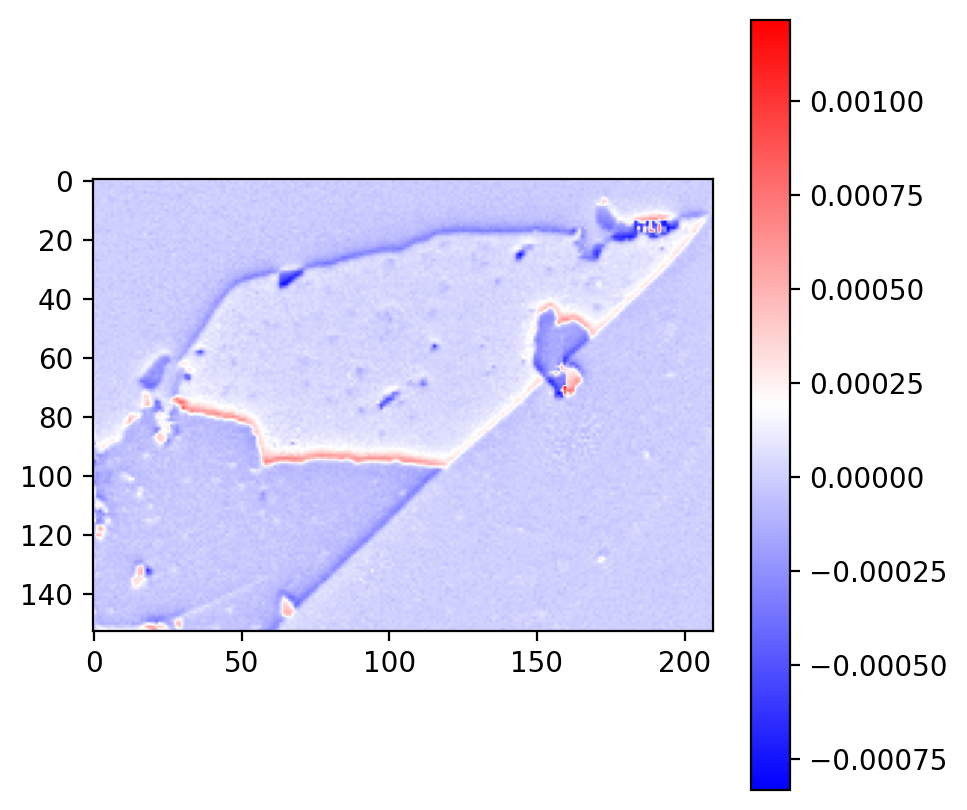

In [7]:
BNV = data["ExperimentMagneticField"]["BNV"]["Data"]

height = data["ExperimentMagneticField"]["BNV"]["Height"]
phi = data["ExperimentMagneticField"]["BNV"]["Phi"]
theta = data["ExperimentMagneticField"]["BNV"]["Theta"]

dx = 50e-9
dy = 50e-9

plt.figure(figsize=(5, 5))
plt.imshow(BNV, cmap="bwr")
plt.colorbar()

# Bx = np.loadtxt(__datapath__ / "experimental" / "NbWire" / "Bx.txt")
# By = np.loadtxt(__datapath__ / "experimental" / "NbWire" / "By.txt")
# Bz = np.loadtxt(__datapath__ / "experimental" / "NbWire" / "Bz.txt")

# B = np.empty(shape=(3, 201, 201))

# B[0, ::] = np.flipud(Bx)
# B[1, ::] = np.flipud(By)
# B[2, ::] = np.flipud(Bz)

# plot_n_components(BNV, cmap="bwr")


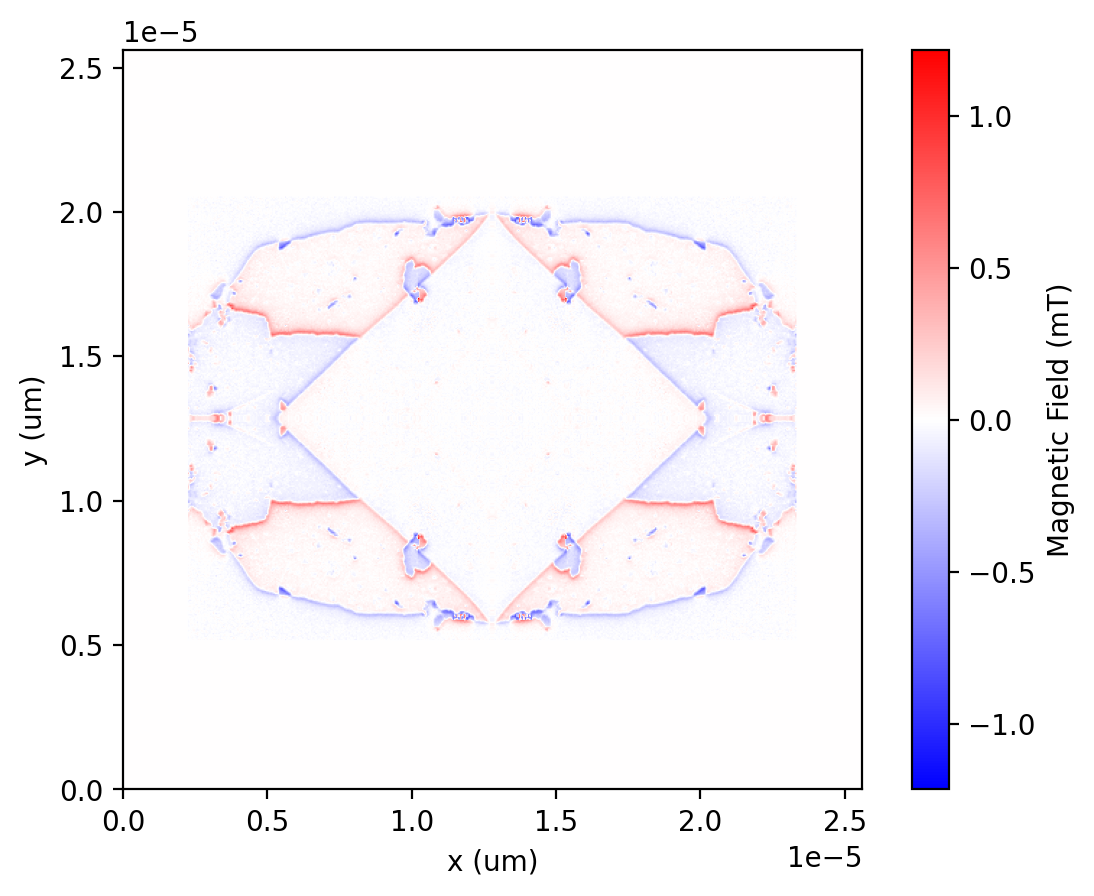

In [8]:


dataset = Data()
dataset.load_data(
       BNV, 
       dx, 
       dy, 
       height, 
       theta, 
       phi, 
       0)

dataset.remove_DC_background()

# dataset.add_hanning_filter(0.4)
# dataset.crop_data((1,198,1,198))

# dataset.numpy_pad_data(200, 'constant')
dataset.pad_reflective2d()
dataset.pad_data_to_power_of_two()
# dataset.pad_reflective2d()

dataset.plot_target()

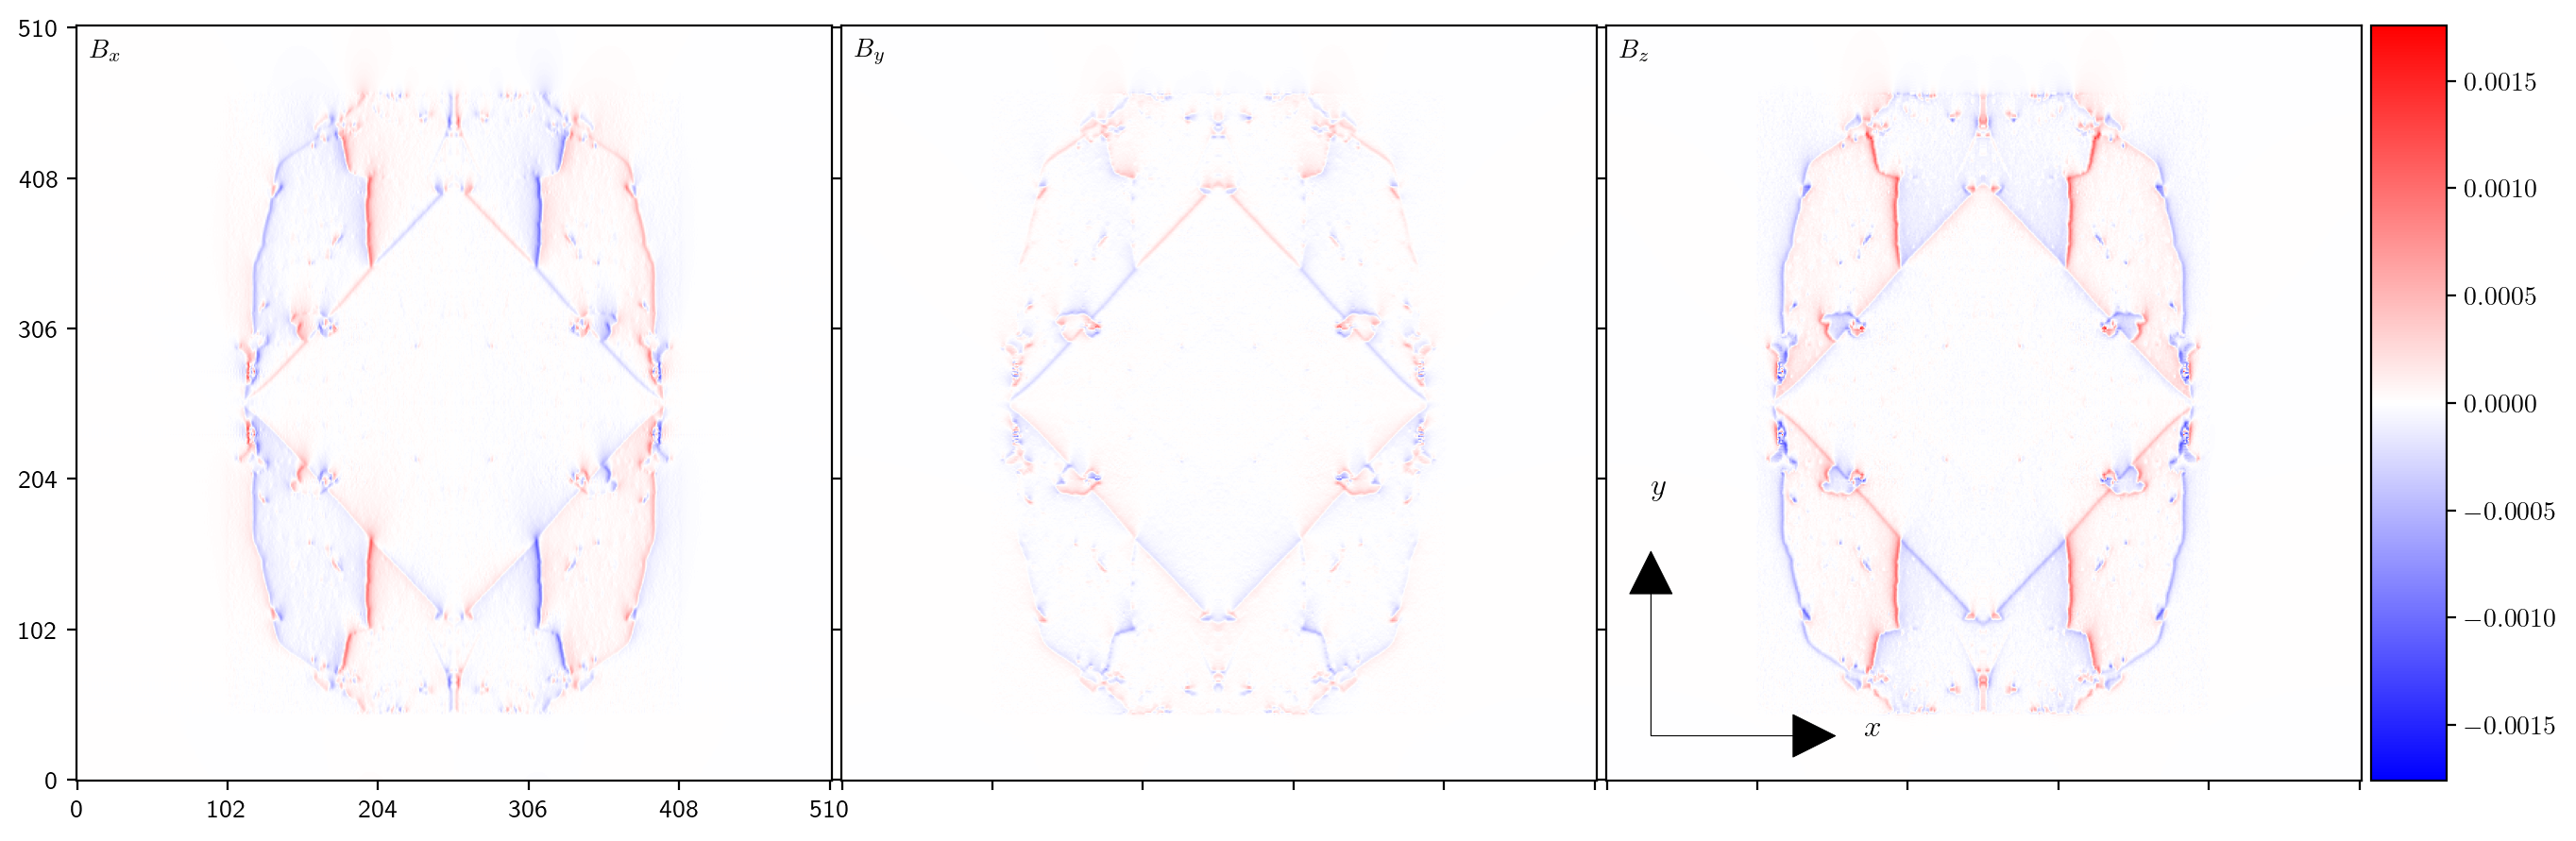

In [9]:
dataset.set_transformer(MagneticFields)
dataset.transform_data()

# plot the reconstructed magnetic field
plot_n_components(dataset.transformed_target, labels=[r'$B_x$', '$B_y$',
                  '$B_z$', '$B_{NV}$'], cmap="bwr")

Removed the padding that was applied to the data
Removed the padding that was applied to the data
Removed the padding that was applied to the data


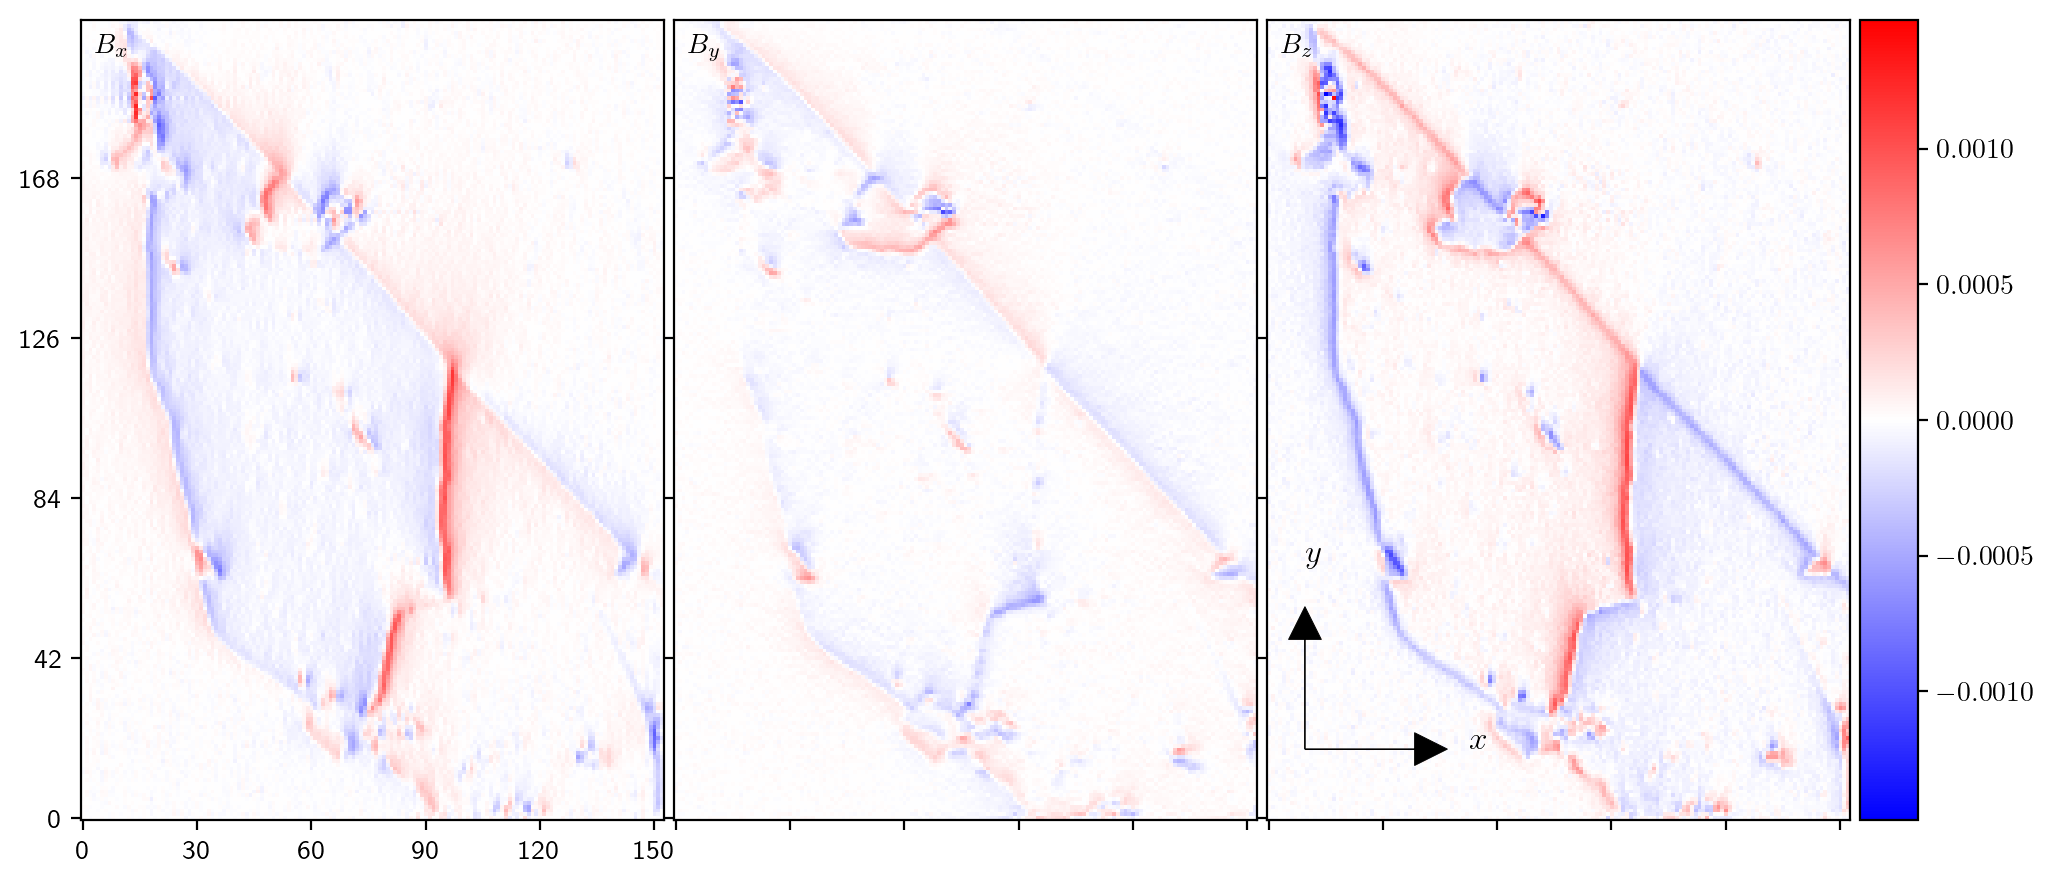

In [10]:
Bx_recon = dataset.remove_padding_from_results(dataset.transformed_target[0, ::])
By_recon = dataset.remove_padding_from_results(dataset.transformed_target[1, ::])
Bz_recon = dataset.remove_padding_from_results(dataset.transformed_target[2, ::])

# collect for plotting 
B_recon = np.empty(shape=(3, 153, 210))
B_recon[0, ::] = Bx_recon
B_recon[1, ::] = By_recon
B_recon[2, ::] = Bz_recon

# plot the reconstructed magnetic field
plot_n_components(B_recon, labels=[r'$B_x$', '$B_y$',
                  '$B_z$', '$B_{NV}$'], cmap="bwr")